# 와인1

## 0.준비

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/와인/train.csv')
test = pd.read_csv('/content/drive/MyDrive/와인/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/와인/sample_submission.csv')

In [ ]:
train

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white


## 1.모델링

### 1) 데이터 전처리

In [ ]:
train['type'] = train['type'].map(lambda x : 0 if x == 'white' else 1)
train

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,0
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,0
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,0
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,0


In [ ]:
train.columns[2:]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type'],
      dtype='object')

In [ ]:
features = train.columns[2:]

In [ ]:
X = train[features]
y = train['quality']

### 2) validation셋 구축

In [ ]:
from sklearn.model_selection import train_test_split

random_state=123123

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=random_state)

In [ ]:
len(X_train), len(X_valid)

(4397, 1100)

### 3) 랜덤포레스트 모델

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=random_state)

model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

### 4) 모델 검증

In [ ]:
import numpy as np

def ACC(true, pred):   
    score = np.mean(true==pred)
    return score

In [ ]:
acc = ACC(y_valid, y_pred)
acc

0.6863636363636364

In [ ]:
validation = pd.DataFrame({'y_valid':y_valid, 'y_pred':y_pred})
validation

,y_valid,y_pred
59,5,5
5422,6,6
3734,5,5
1704,6,6
5449,6,6
...,...,...
2602,5,5
224,5,5
2592,3,5
1726,5,5


In [ ]:
validation_count = pd.DataFrame(validation['y_valid'].value_counts().sort_index())
validation_count.loc[validation['y_pred'].value_counts().sort_index().index, 'y_pred'] = validation['y_pred'].value_counts().sort_index()
validation_count = validation_count.fillna(0)
validation_count

,y_valid,y_pred
3,4,0.0
4,28,4.0
5,397,352.0
6,459,592.0
7,183,139.0
8,29,13.0


### 5) 시각화

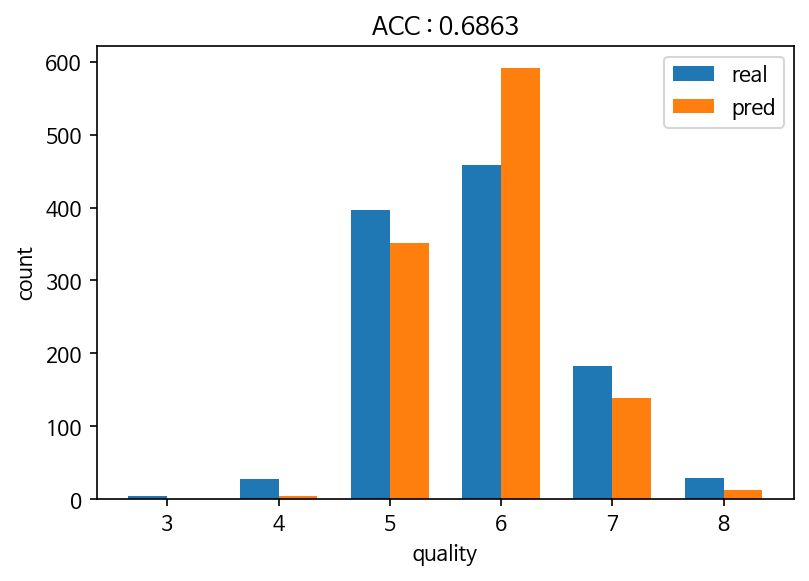

In [ ]:
x = validation_count.index
y_valid_count = validation_count['y_valid']
y_pred_count = validation_count['y_pred']

width = 0.35

plt.figure(dpi=150)

plt.title('ACC : ' + str(acc)[:6])
plt.xlabel('quality')
plt.ylabel('count')

p1 = plt.bar([idx-width/2 for idx in x], y_valid_count, width, label='real')
p2 = plt.bar([idx+width/2 for idx in x], y_pred_count,  width, label='pred')

plt.legend()
plt.show()

In [ ]:
def make_plot():

  acc = ACC(y_valid, y_pred)

  validation = pd.DataFrame({'y_valid':y_valid, 'y_pred':y_pred})

  validation_count = pd.DataFrame(validation['y_valid'].value_counts().sort_index())
  validation_count.loc[validation['y_pred'].value_counts().sort_index().index, 'y_pred'] = validation['y_pred'].value_counts().sort_index()
  validation_count = validation_count.fillna(0)

  x = validation_count.index
  y_valid_count = validation_count['y_valid']
  y_pred_count = validation_count['y_pred']

  width = 0.35

  plt.figure(dpi=150)

  plt.title('ACC : ' + str(acc)[:6])
  plt.xlabel('quality')
  plt.ylabel('count')

  p1 = plt.bar([idx-width/2 for idx in x], y_valid_count, width, label='real')
  p2 = plt.bar([idx+width/2 for idx in x], y_pred_count,  width, label='pred')

  plt.legend()
  plt.show()

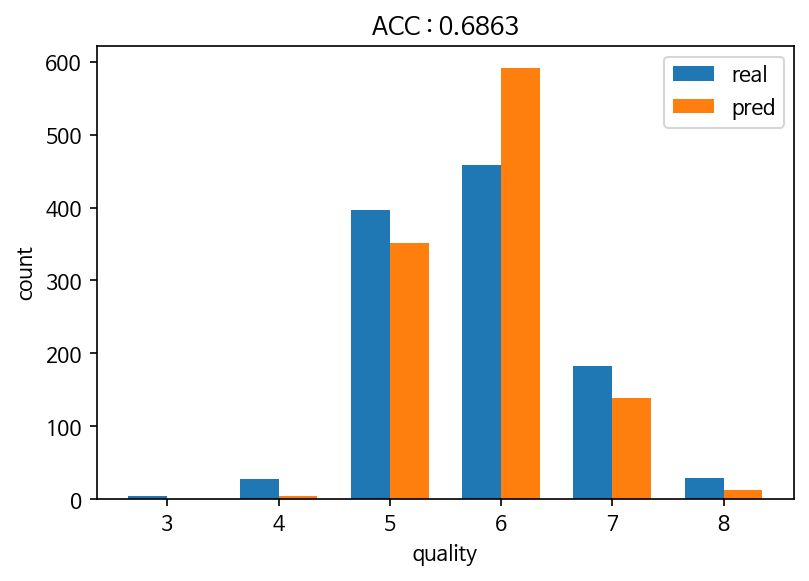

In [ ]:
make_plot()

## 2.EDA-target

In [ ]:
train

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,0
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,0
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,0
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,0


### 1) 와인 품질 분포

In [ ]:
train['quality'].value_counts().sort_index()

3      26
4     186
5    1788
6    2416
7     924
8     152
9       5
Name: quality, dtype: int64

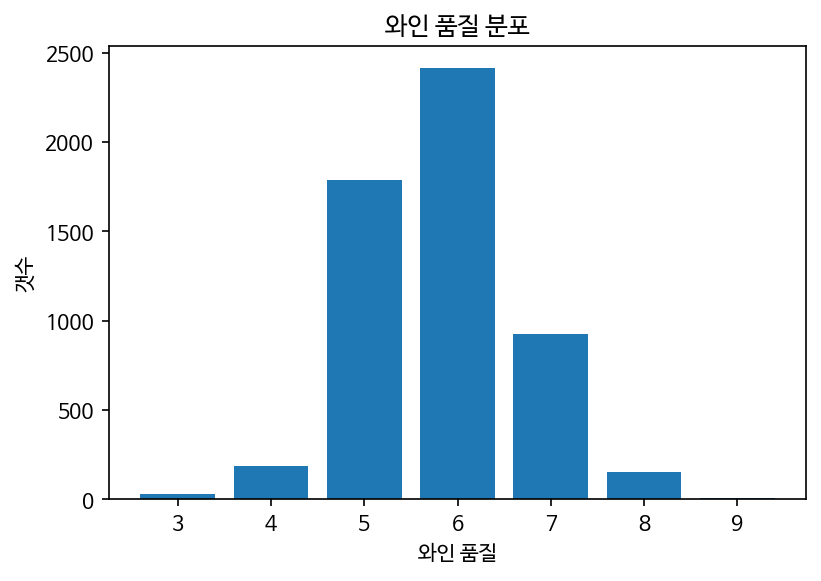

In [ ]:
x = train['quality'].value_counts().sort_index().index
y = train['quality'].value_counts().sort_index().values

plt.figure(dpi=150)

plt.title('와인 품질 분포')
plt.xlabel('와인 품질')
plt.ylabel('갯수')

plt.bar(x,y)
plt.show()

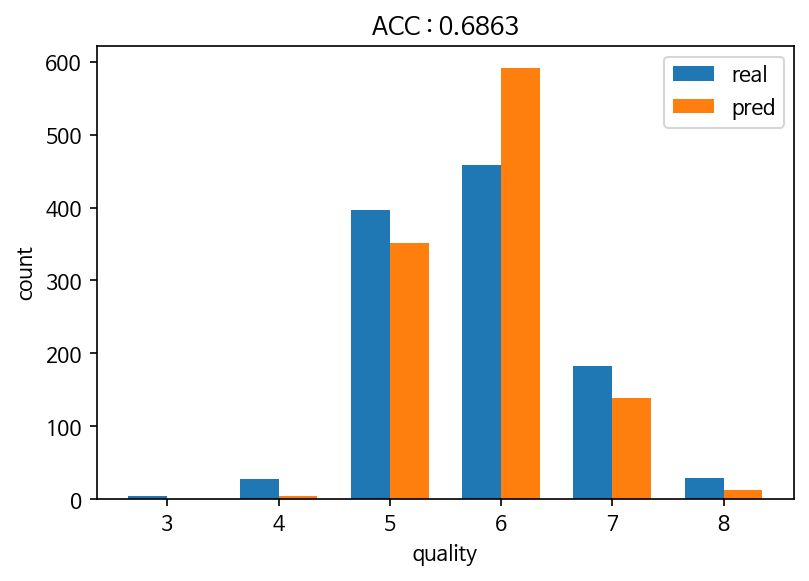

In [ ]:
make_plot()

### 2) 모델 수정 - 오버 샘플링



In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(k_neighbors=2)

X_resampled, y_resampled = sm.fit_resample(X_train,y_train)

In [ ]:
y_train.value_counts().sort_index()

3      22
4     158
5    1391
6    1957
7     741
8     123
9       5
Name: quality, dtype: int64

In [ ]:
pd.DataFrame(y_resampled).value_counts().reset_index()

,quality,0
0,3,1957
1,4,1957
2,5,1957
3,6,1957
4,7,1957
5,8,1957
6,9,1957


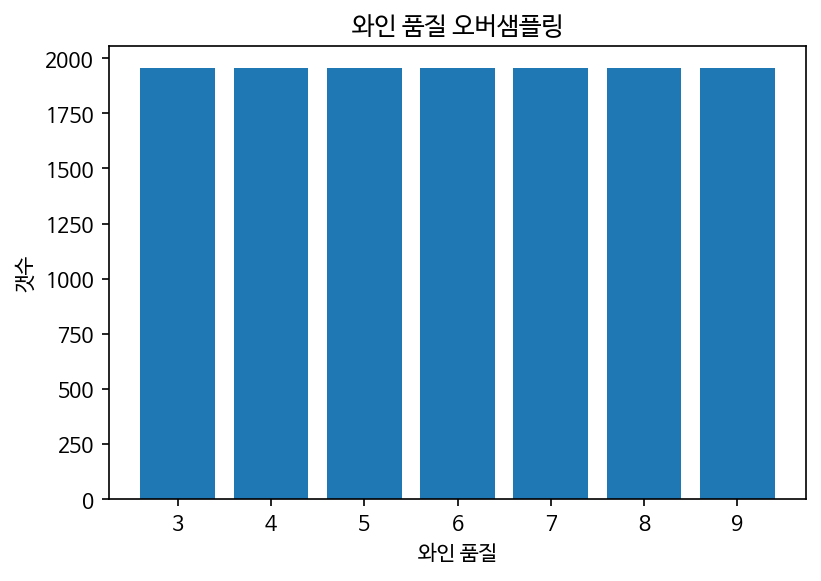

In [ ]:
x = pd.DataFrame(y_resampled).value_counts().reset_index()['quality']
y = pd.DataFrame(y_resampled).value_counts().reset_index()[0]

plt.figure(dpi=150)

plt.title('와인 품질 오버샘플링')
plt.xlabel('와인 품질')
plt.ylabel('갯수')

plt.bar(x,y)
plt.show()

In [ ]:
model = RandomForestClassifier()

model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_valid)

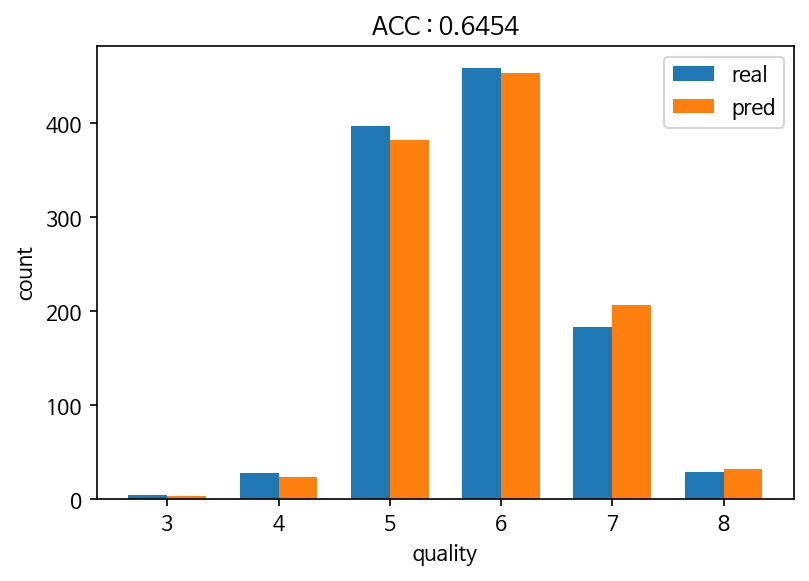

In [ ]:
make_plot()

### 3) 모델 수정 - 적은 데이터 삭제하고 오버샘플링

In [ ]:
train['quality'].value_counts()

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64

In [ ]:
temp = train[(train['quality'] != 3) & (train['quality'] != 9)]
temp['quality'].value_counts().sort_index()

4     186
5    1788
6    2416
7     924
8     152
Name: quality, dtype: int64

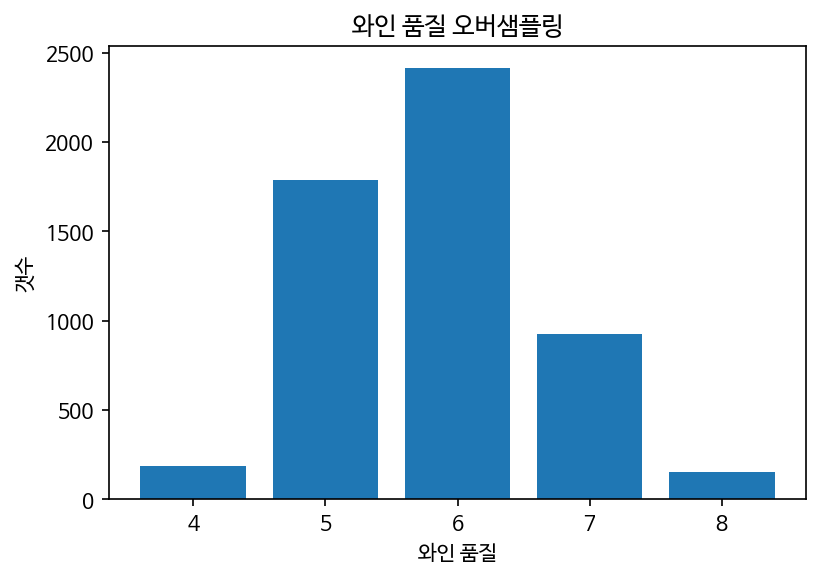

In [ ]:
x = temp['quality'].value_counts().sort_index().index
y = temp['quality'].value_counts().sort_index().values

plt.figure(dpi=150)

plt.title('와인 품질 오버샘플링')
plt.xlabel('와인 품질')
plt.ylabel('갯수')

plt.bar(x,y)
plt.show()

In [ ]:
X = temp[features]
y = temp['quality']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=random_state)

In [ ]:
sm = SMOTE(k_neighbors=3)

X_resampled, y_resampled = sm.fit_resample(X_train,y_train)

In [ ]:
y_resampled.value_counts().sort_index()

4    1926
5    1926
6    1926
7    1926
8    1926
Name: quality, dtype: int64

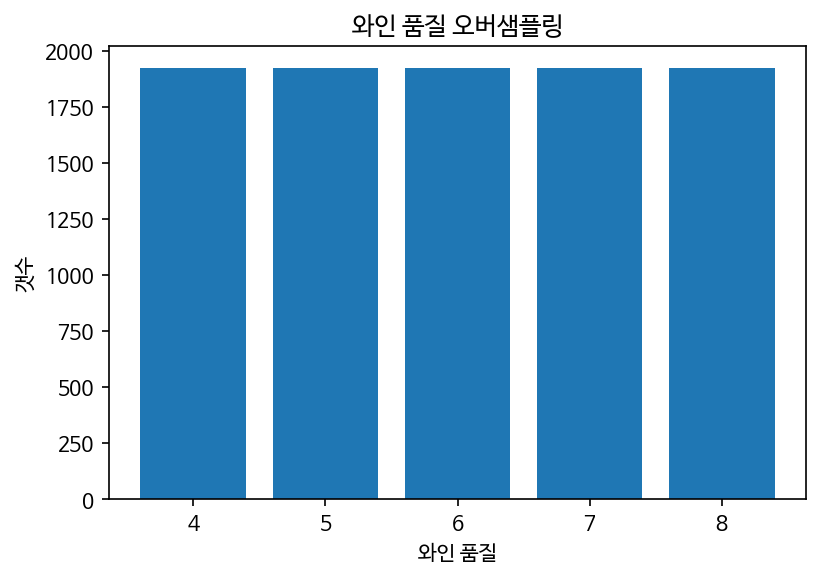

In [ ]:
x = y_resampled.value_counts().sort_index().index
y = y_resampled.value_counts().sort_index().values

plt.figure(dpi=150)

plt.title('와인 품질 오버샘플링')
plt.xlabel('와인 품질')
plt.ylabel('갯수')

plt.bar(x,y)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_valid)

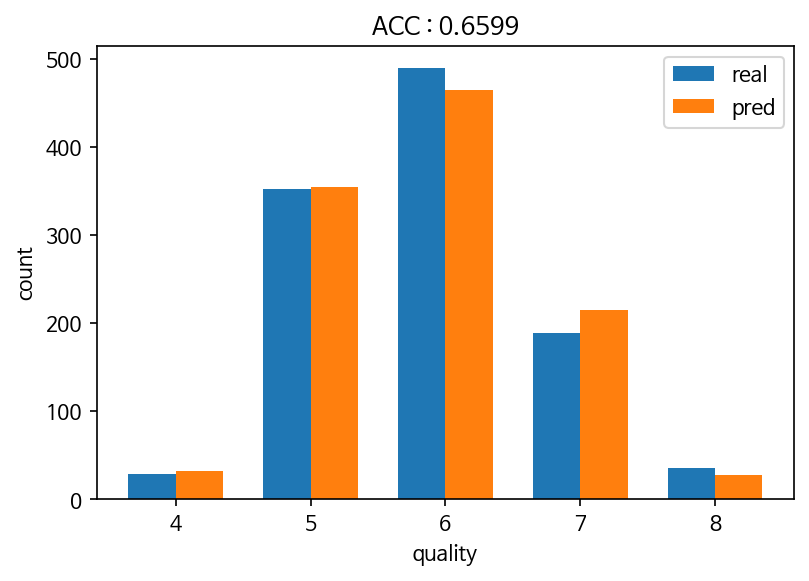

In [ ]:
make_plot()

### 4) 모델 수정 - 적은 데이터만 두배로 늘리기

In [ ]:
train['quality'].value_counts().sort_index()

3      26
4     186
5    1788
6    2416
7     924
8     152
9       5
Name: quality, dtype: int64

In [ ]:
train = train.append(train[train['quality'].isin([4,7,8])])
train['quality'].value_counts().sort_index()

3      26
4     372
5    1788
6    2416
7    1848
8     304
9       5
Name: quality, dtype: int64

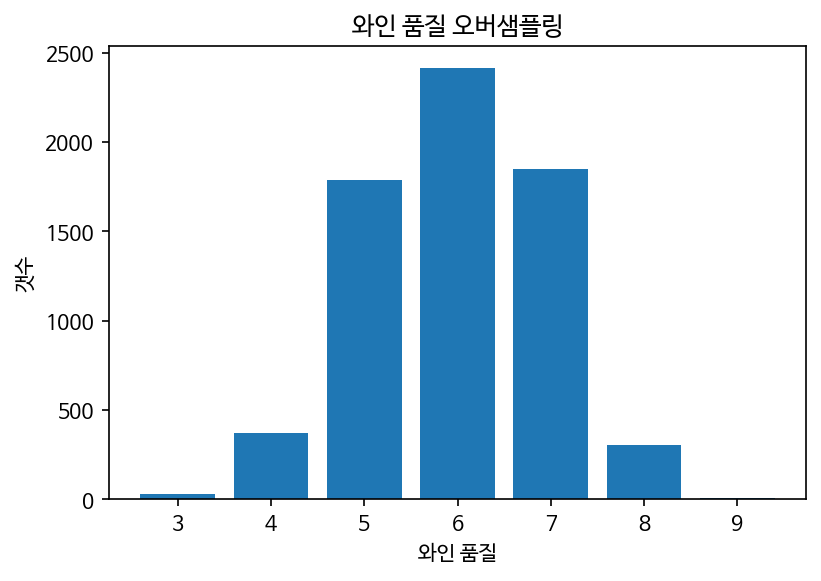

In [ ]:
x = train['quality'].value_counts().sort_index().index
y = train['quality'].value_counts().sort_index().values

plt.figure(dpi=150)

plt.title('와인 품질 오버샘플링')
plt.xlabel('와인 품질')
plt.ylabel('갯수')

plt.bar(x,y)
plt.show()

In [ ]:
X = train[features]
y = train['quality']

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, shuffle=True, stratify=y, random_state=random_state)

In [ ]:
model = RandomForestClassifier(random_state=random_state)

model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

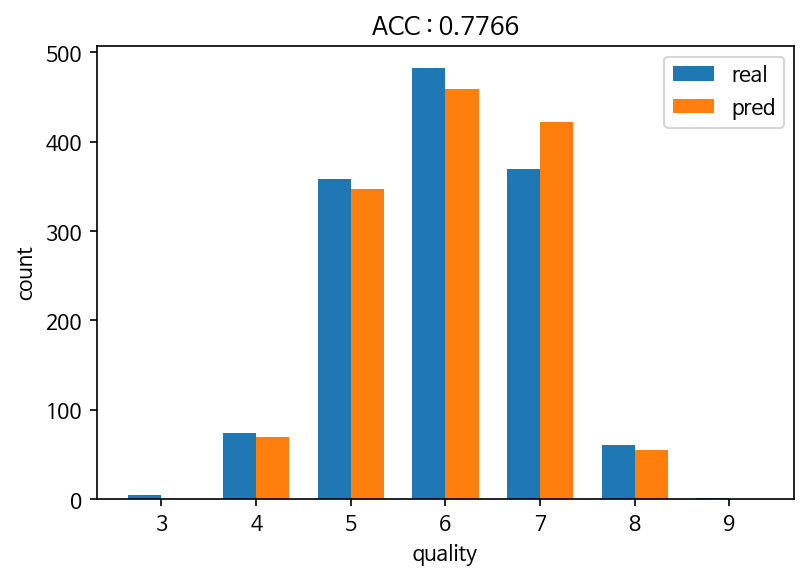

In [ ]:
make_plot()

## 3.K-Fold validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle = True)

for train_idx, valid_idx in kfold.split(X, y):
  X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
  y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

  display(X_valid)

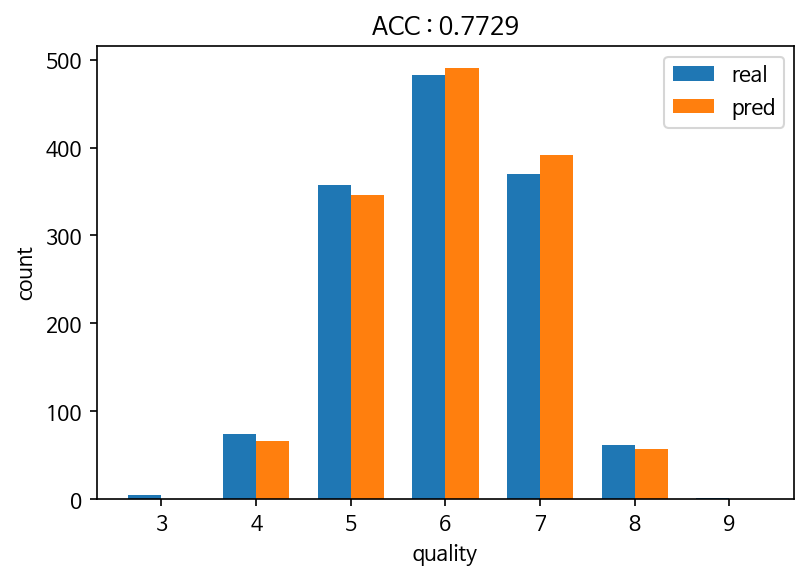

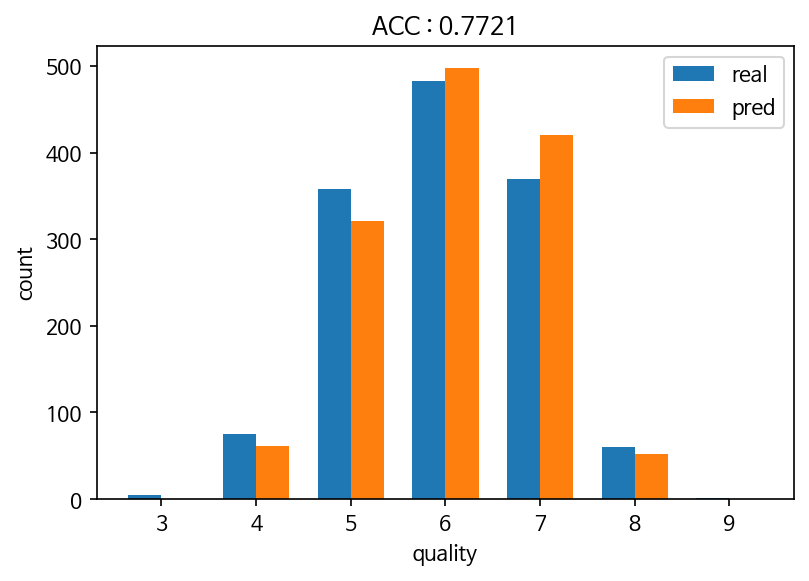

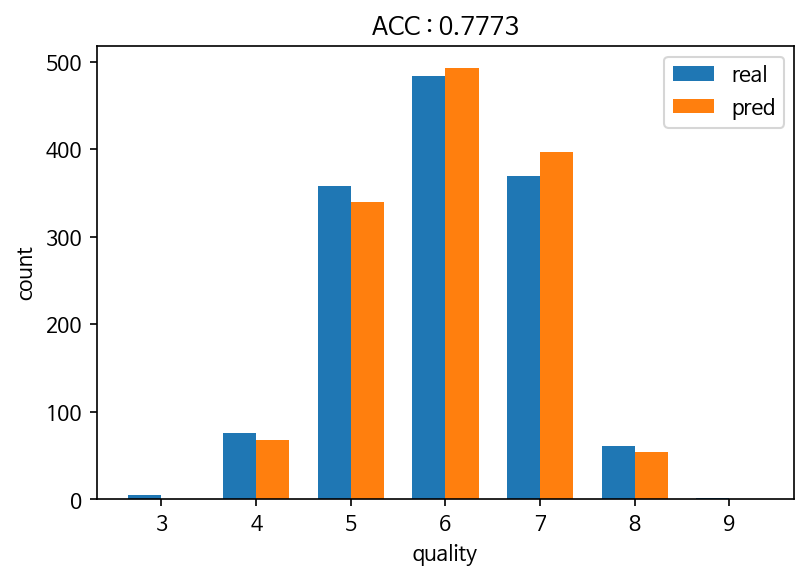

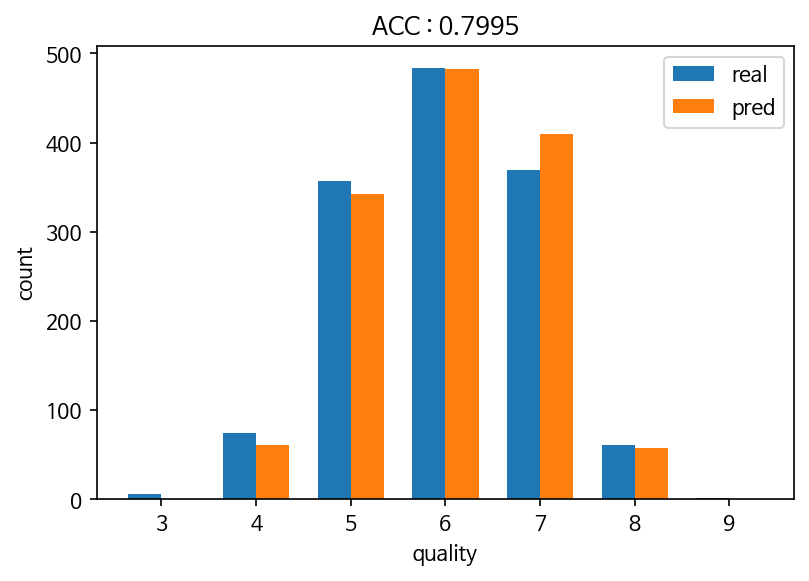

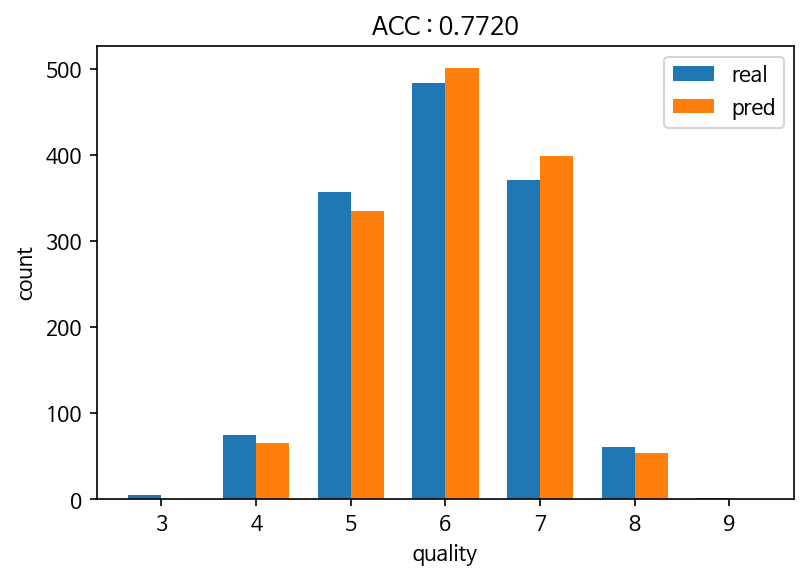

In [ ]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle = True)

for train_idx, valid_idx in kfold.split(X, y):
  X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
  y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

  model = RandomForestClassifier()

  model.fit(X_train, y_train)

  y_pred = model.predict(X_valid)

  make_plot()

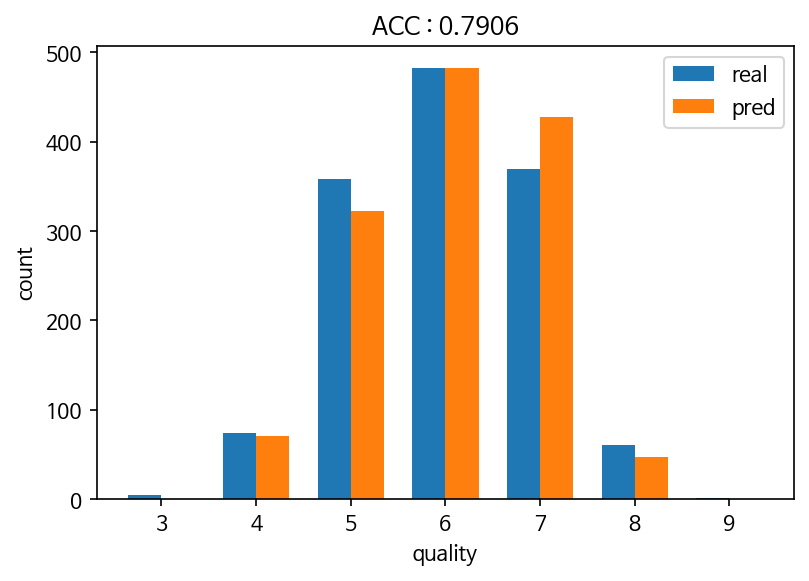

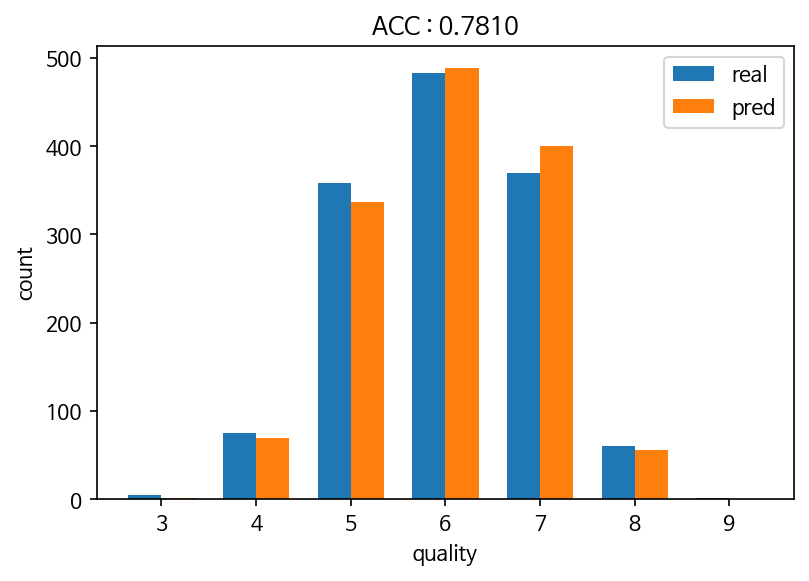

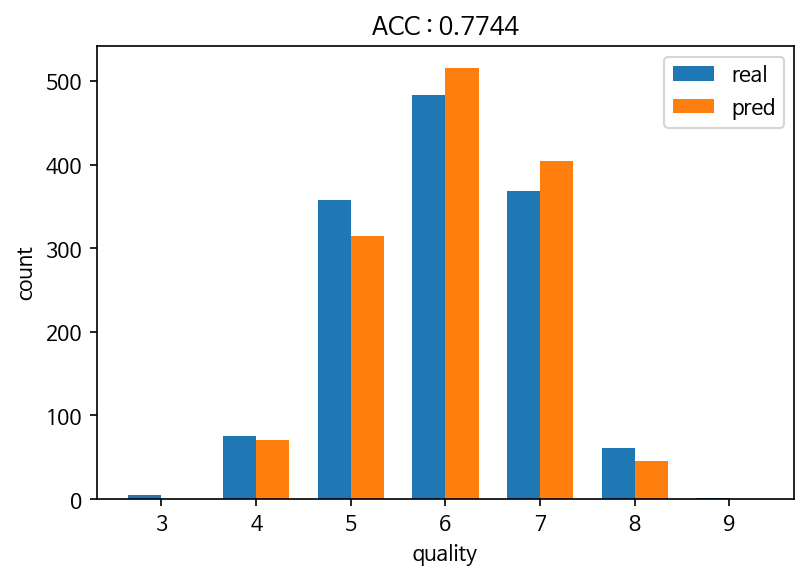

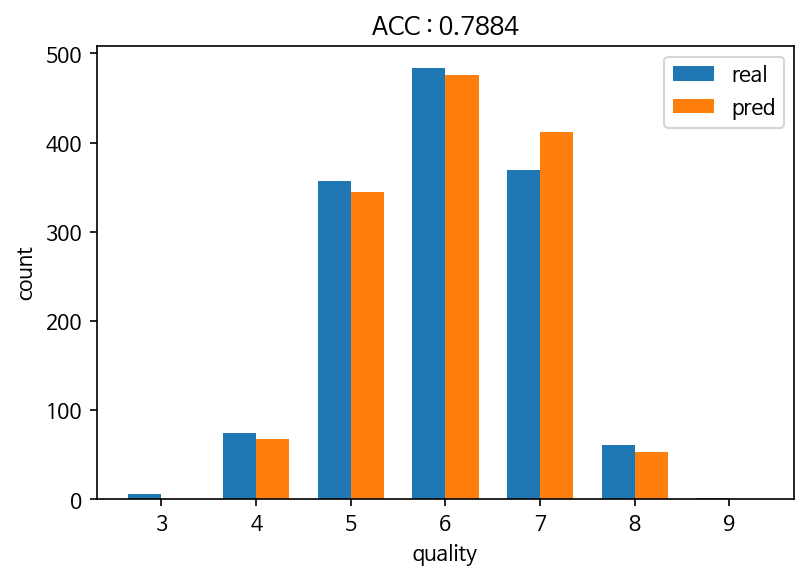

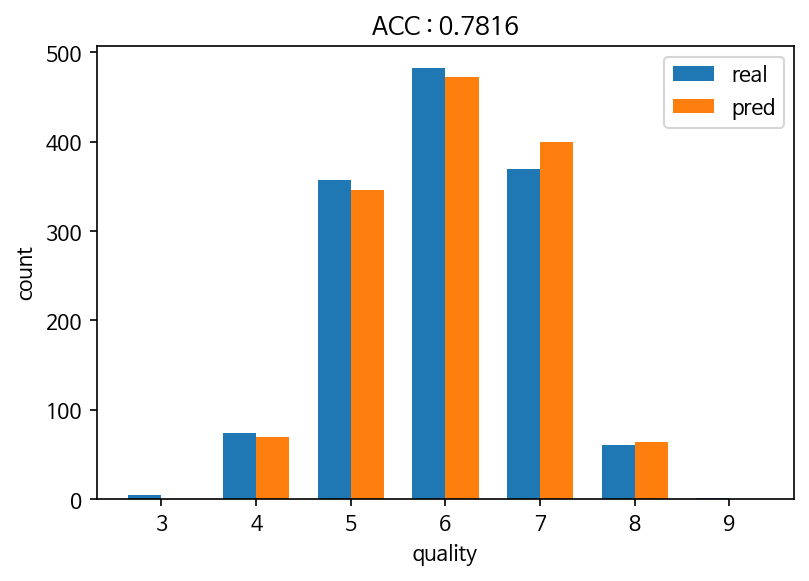

In [ ]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle = True)
# 추가
models = []
for train_idx, valid_idx in kfold.split(X, y):
  X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
  y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

  model = RandomForestClassifier()

  model.fit(X_train, y_train)

  #추가
  models.append(model)

  y_pred = model.predict(X_valid)

  make_plot()

In [ ]:
test

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.60,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.90,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.20,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.80,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.00,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,7.1,0.59,0.02,2.30,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,red
996,996,8.7,0.15,0.30,1.60,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,white
997,997,8.8,0.66,0.26,1.70,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,red
998,998,7.0,0.42,0.19,2.30,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,red


In [ ]:
test['type'] = test['type'].map(lambda x : 0 if x == 'white' else 1)

In [ ]:
submission['quality'] = models[0].predict(test[features])
submission.to_csv('submission1.csv', index=False)

# 점수 : 0.674

In [ ]:
submission['quality'] = models[1].predict(test[features])
submission.to_csv('submission2.csv', index=False)

# 점수 : 0.676

## 4.K-Fold ensemble

In [ ]:
pred0 = models[0].predict(test[features])
pred1 = models[1].predict(test[features])
pred2 = models[2].predict(test[features])
pred3 = models[3].predict(test[features])
pred4 = models[4].predict(test[features])

In [ ]:
pd.DataFrame(pred0)

,0
0,5
1,6
2,6
3,5
4,7
...,...
995,6
996,6
997,5
998,6


In [ ]:
pd.DataFrame(pred1)

,0
0,6
1,5
2,6
3,5
4,6
...,...
995,6
996,6
997,5
998,6


In [ ]:
pd.DataFrame(pred4)

,0
0,5
1,6
2,6
3,6
4,6
...,...
995,6
996,6
997,5
998,6


In [ ]:
pred = pd.DataFrame({'pred0':pred0, 'pred1':pred1, 'pred2':pred2, 'pred3':pred3, 'pred4':pred4})
pred

,pred0,pred1,pred2,pred3,pred4
0,5,6,5,5,5
1,6,5,6,5,6
2,6,6,6,6,6
3,5,5,5,5,6
4,7,6,6,6,6
...,...,...,...,...,...
995,6,6,6,5,6
996,6,6,6,6,6
997,5,5,5,5,5
998,6,6,6,6,6
